lets import all the libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
np.random.seed(42)

In [3]:
dogs_wishker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_flappiness_index = np.random.normal(loc =8, scale=1, size=10)

In [4]:
# dogs_wishker_length


# dogs_flappiness_index

In [5]:
cats_wishker_length = np.random.normal(loc=8, scale=1, size=10)
cats_flappiness_index = np.random.normal(loc =5, scale=1, size=10)

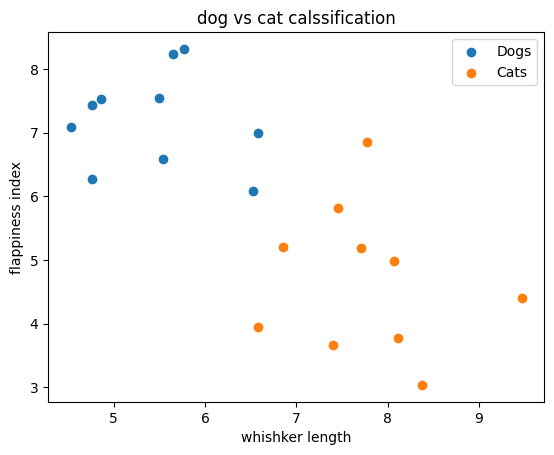

In [6]:
plt.scatter(dogs_wishker_length,dogs_flappiness_index,label='Dogs')
plt.scatter(cats_wishker_length,cats_flappiness_index,label='Cats')
plt.xlabel('whishker length')
plt.ylabel('flappiness index')
plt.title('dog vs cat calssification')
plt.legend()
plt.show()

In [7]:
def computeError(dogs_data, cats_data, theta, theta0):
    error = 0
    for dog in dogs_data:
        if np.dot(theta, dog) + theta0  <= 0:
            error += 1
    for cat in cats_data:
        if np.dot(theta , cat) + theta0 > 0:
            error += 1
    return error



# reanom linear classifier algo
def randomLinearClassifier(dogs_data, cats_data, k, d, rng=None):
    if rng is None:
        rng = np.random.default_rng(42)  # Use a fixed seed if none is passed

    # d = no.of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    # np.random.seed(42) requires only if you want same output every time and generate same random values every time
    for i in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        # lets calculate error
        error = computeError(dogs_data, cats_data, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    return best_theta, best_theta0, best_error

In [8]:
# so here θ₀ + θ₁x₁ + θ₂x₂ = 0
# this is also equal to 
# [θ₀, θ₁, θ₂] ⋅ [1, x₁, x₂]ᵀ = 0

In [9]:
dogs_data = np.vstack((dogs_wishker_length,dogs_flappiness_index,)).T
cats_data = np.vstack((cats_wishker_length,cats_flappiness_index,)).T

data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)),np.ones(len(cats_data))))



In [10]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [11]:
X_train, X_test , Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


### basically we have total 20 points total from each x and 20 for y so train data is (0.2 = 20 percent) which is 4 points

Best θ (weights): [-0.676922    0.61167629]
Best θ₀ (bias): 1.030999522495951


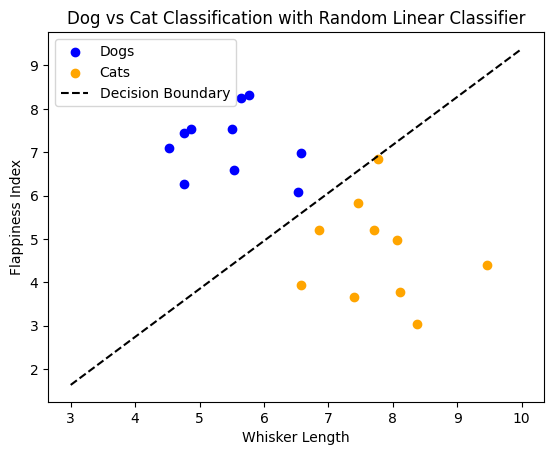

In [12]:
rng = np.random.default_rng(42)  # Reusable and consistent RNG
theta, theta0, best_error = randomLinearClassifier(dogs_data, cats_data, k=100, d=2, rng=rng)
print("Best θ (weights):", theta)
print("Best θ₀ (bias):", theta0)

# 📊 Plot decision boundary
plt.scatter(dogs_wishker_length, dogs_flappiness_index, label='Dogs', color='blue')
plt.scatter(cats_wishker_length, cats_flappiness_index, label='Cats', color='orange')

# Decision boundary: θ₁x₁ + θ₂x₂ + θ₀ = 0 → x₂ = -(θ₁x₁ + θ₀)/θ₂
x_values = np.linspace(3, 10, 100)
y_values = -(theta[0]*x_values + theta0) / theta[1]

plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()

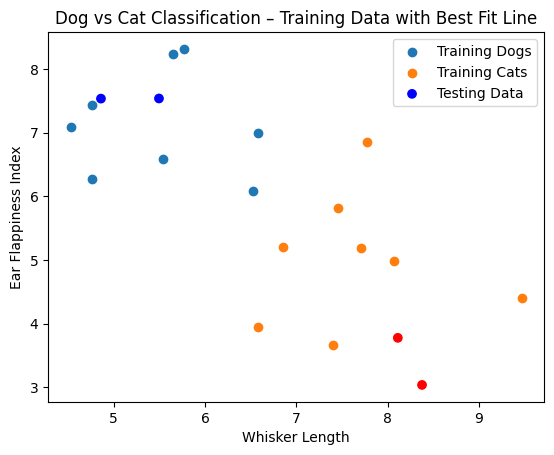

In [13]:
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label='Training Dogs')
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Training Cats')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification – Training Data with Best Fit Line')

# Show legend and plot
plt.legend()
plt.show()


In [14]:
best_theta_train, best_theta0_train, best_train_error = randomLinearClassifier(X_train[Y_train == 0], X_train[Y_train == 1], k=100, d=2, rng=rng)


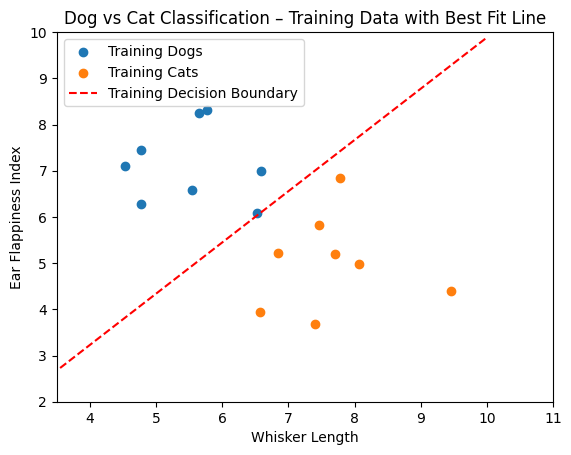

In [15]:
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])
# plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Training Decision Boundary')


# Plot training dogs
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], label='Training Dogs')

# Plot training cats
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Training Cats')

# Plot decision boundary
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--',
         label='Training Decision Boundary')

# Set same limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)

# Add labels and title
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification – Training Data with Best Fit Line')

# Show legend and plot
plt.legend()
plt.show()



In [16]:
best_train_error

0

In [17]:
test_error = computeError(X_test[Y_test== 0], X_test[Y_test == 1], best_theta_train, best_theta0_train)

test_error

0

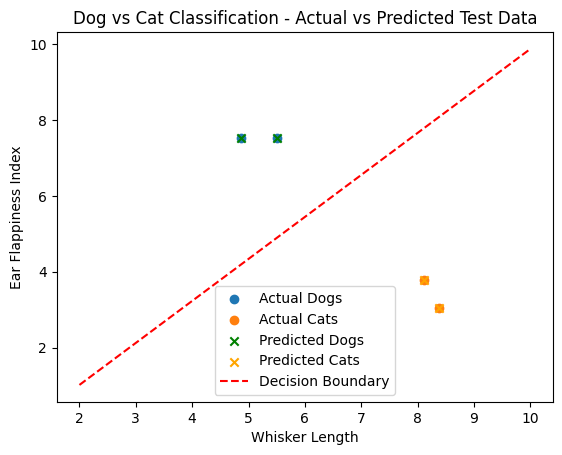

In [18]:
# Plot the actual test data and predicted test data
plt.scatter(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], label='Actual Dogs')
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Actual Cats')

# Predict test data points using the decision boundary 
predicted_test_labels = np.ones_like(Y_test)
for i, x_test in enumerate(X_test):
  if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
    predicted_test_labels[i] = 0
  
# Plot predicted test data points
plt.scatter(X_test[predicted_test_labels == 0][:, 0], X_test[predicted_test_labels == 0][:, 1], marker='x', label='Predicted Dogs', color='green')
plt.scatter(X_test[predicted_test_labels == 1][:, 0], X_test[predicted_test_labels == 1][:, 1], marker='x', label='Predicted Cats', color='orange')

# Plot decision boundary
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()

- cross validation errors  => for most optimal hypothesis and K

In [19]:
# Define function for k-fold cross-validation
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = randomLinearClassifier(
                X_train_fold[y_train_fold == 0],
                X_train_fold[y_train_fold == 1],
                k, d, rng = rng
            )

            errors.append(computeError(
                X_val_fold[y_val_fold == 0],
                X_val_fold[y_val_fold == 1],
                best_theta_fold,
                best_theta0_fold
            ))

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define k values to try
k_values = [1, 10, 50, 100, 200, 350]
best_k = cross_validate(dogs_data, cats_data, k_values , d = 2)

print(best_k)

100
